# Indian General Elections 2019: Data Analysis And Prediction Using Machine Learning

<img src="https://www.ft.com/__origami/service/image/v2/images/raw/http%3A%2F%2Fcom.ft.imagepublish.upp-prod-us.s3.amazonaws.com%2F5c2322c8-7deb-11e9-81d2-f785092ab560?fit=scale-down&source=next&width=700" width="1000">

## Table of contents

1. Introduction
2. Environment setup
3. Gathering the data
4. Features
5. Preprocessing and Exploratory Data Analysis (EDA)
    - Lok sabha 2019: Election results
    - Party-wise vote share
    - Age distribution of candidates
6. Preparing the data
    - Resampling the data
    - Scaling the data
7. Machine learning model experimentation
    - Experimenting with different machine learning models
    - Manual hyperparameter tuning
    - Hyperparameter tuning using GridSearchCV
8. Evaluating the machine learning models
    - Classification report
    - Confusion matrix
    - ROC Curve
    - Cross-validated metrics
9. Conclusion

## 1. Introduction

<p> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/March_2020_Parliament_Lok_sabha.svg/1200px-March_2020_Parliament_Lok_sabha.svg.png", style="float:top", width="300", height="180"> </p>
<br>
<p> The 2019 Indian general election was held in seven phases from 11 April to 19 May 2019 to constitute the 17th Lok Sabha. The votes were counted, and the result was declared on 23 May. About 911 million people were eligible to vote, and voter turnout was over 67 percent – the highest ever and the highest ever participation by women voters.
The Bharatiya Janata Party won 303 seats, further increasing its substantial majority, and the BJP-led National Democratic Alliance (NDA) won 353 seats. The BJP won 37.36% of votes, while the NDA's combined ballot was 45% of the 60.37 crore votes that were polled. The Indian National Congress won just 52 seats, and the Congress-led United Progressive Alliance won 91. Other parties and their alliances won 98 seats. </p>
<br>
<p> In this notebook, I have used data visualization tools such as Matplotlib, Plotly, and Seaborn to visualize how India's people voted during the 2019 elections. I have also experimented with Random Forest Classifier, Support Vector Machine, and K-Nearest Neighbor machine learning models to make predictions. The models' hyperparameters were first tuned manually, and then GridSearchCV was used to find the most optimum results. I have also evaluated the performance metrics of these models and compared them with each other. </p>

## 2. Environment setup

In [61]:
# Import numpy, pandas for data manipulation
import numpy as np
import pandas as pd

# Import plotly, matplotlib and seaborn as visualization tools
import matplotlib.pyplot as plt
from plotly import tools
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode
import seaborn as sns

# Import for resampling the data
from sklearn.utils import resample

# Import for scaling the data
from sklearn.preprocessing import StandardScaler

# Import machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Import model evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Plot should appear inside the jupyter notebook
%matplotlib inline

init_notebook_mode(connected=True)

## 3. Gathering the data

> The data for this project has been collected from Kaggle:
https://www.kaggle.com/prakrutchauhan/indian-candidates-for-general-election-2019

In [62]:
# Loading the dataset
df = pd.read_csv("data/LS_2.0.csv")

In [63]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\r\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\r\nVOTES,POSTAL\r\nVOTES,TOTAL\r\nVOTES,OVER TOTAL ELECTORS \r\nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \r\nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\r\n ~ 30 Lacs+","Rs 2,31,450\r\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\r\n ~ 1 Crore+","Rs 8,47,000\r\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\r\n ~ 3 Crore+","Rs 1,53,00,000\r\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\r\n ~ 7 Crore+","Rs 86,06,522\r\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [64]:
df.shape

(2263, 19)

In [65]:
df.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL\r\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\r\nVOTES', 'POSTAL\r\nVOTES', 'TOTAL\r\nVOTES',
       'OVER TOTAL ELECTORS \r\nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \r\nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

## 4. Features

- STATE
- CONSTITUENCY
- NAME
- WINNER
- PARTY
- SYMBOL
- GENDER
- CRIMINAL CASES
- AGE
- CATEGORY
- EDUCATION
- ASSETS
- LIABILITIES
- GENERAL VOTES 
- POSTAL VOTES
- TOTAL VOTES
- OVER TOTAL ELECTORS IN CONSTITUENCY
- OVER TOTAL VOTES POLLED IN CONSTITUENCY
- TOTAL ELECTORS

## 5. Exploratory Data Analysis (EDA)

In [66]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\r\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\r\nVOTES,POSTAL\r\nVOTES,TOTAL\r\nVOTES,OVER TOTAL ELECTORS \r\nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \r\nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\r\n ~ 30 Lacs+","Rs 2,31,450\r\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\r\n ~ 1 Crore+","Rs 8,47,000\r\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\r\n ~ 3 Crore+","Rs 1,53,00,000\r\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\r\n ~ 7 Crore+","Rs 86,06,522\r\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   STATE                                      2263 non-null   object 
 1   CONSTITUENCY                               2263 non-null   object 
 2   NAME                                       2263 non-null   object 
 3   WINNER                                     2263 non-null   int64  
 4   PARTY                                      2263 non-null   object 
 5   SYMBOL                                     2018 non-null   object 
 6   GENDER                                     2018 non-null   object 
 7   CRIMINAL
CASES                            2018 non-null   object 
 8   AGE                                        2018 non-null   float64
 9   CATEGORY                                   2018 non-null   object 
 10  EDUCATION                

In [68]:
df.columns = df.columns.str.replace('\r','')
df.columns = df.columns.str.replace('\n','')

In [69]:
df.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINALCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERALVOTES', 'POSTALVOTES', 'TOTALVOTES',
       'OVER TOTAL ELECTORS IN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED IN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

In [70]:
df.describe()

,WINNER,AGE,GENERALVOTES,POSTALVOTES,TOTALVOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
count,2263.000000,2018.000000,2.263000e+03,2263.000000,2.263000e+03,2263.000000,2263.000000,2.263000e+03
mean,0.238179,52.273538,2.615991e+05,990.710561,2.625898e+05,15.811412,23.190525,1.658016e+06
std,0.426064,11.869373,2.549906e+05,1602.839174,2.559822e+05,14.962861,21.564758,3.145187e+05
min,0.000000,25.000000,1.339000e+03,0.000000,1.342000e+03,0.097941,1.000039,5.518900e+04
25%,0.000000,43.250000,2.103450e+04,57.000000,2.116250e+04,1.296518,1.899502,1.530014e+06
50%,0.000000,52.000000,1.539340e+05,316.000000,1.544890e+05,10.510553,16.221721,1.679030e+06
75%,0.000000,61.000000,4.858040e+05,1385.000000,4.872315e+05,29.468185,42.590233,1.816857e+06
max,1.000000,86.000000,1.066824e+06,19367.000000,1.068569e+06,51.951012,74.411856,3.150313e+06


In [71]:
# Checking to see if the dataset contains any null values. We need to exclude NOTA votes while checking it.
df_NOTA = df[df['PARTY']!= 'NOTA']
df_NOTA.isna().sum()

STATE                                      0
CONSTITUENCY                               0
NAME                                       0
WINNER                                     0
PARTY                                      0
SYMBOL                                     0
GENDER                                     0
CRIMINALCASES                              0
AGE                                        0
CATEGORY                                   0
EDUCATION                                  0
ASSETS                                     0
LIABILITIES                                0
GENERALVOTES                               0
POSTALVOTES                                0
TOTALVOTES                                 0
OVER TOTAL ELECTORS IN CONSTITUENCY        0
OVER TOTAL VOTES POLLED IN CONSTITUENCY    0
TOTAL ELECTORS                             0
dtype: int64

In [72]:
df_NOTA.shape

(2018, 19)

In [73]:
df_NOTA.head(20)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINALCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERALVOTES,POSTALVOTES,TOTALVOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\r\n ~ 30 Lacs+","Rs 2,31,450\r\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\r\n ~ 1 Crore+","Rs 8,47,000\r\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\r\n ~ 3 Crore+","Rs 1,53,00,000\r\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\r\n ~ 7 Crore+","Rs 86,06,522\r\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,"Rs 13,37,84,385\r\n ~ 13 Crore+","Rs 2,22,51,891\r\n ~ 2 Crore+",434199,1130,435329,22.466390,37.999125,1937690
6,Uttar Pradesh,AGRA,Preeta Harit,0,INC,Hand,FEMALE,0,54.0,SC,Post Graduate,"Rs 5,50,75,753\r\n ~ 5 Crore+",Rs 0\r\n ~,44877,272,45149,2.330042,3.940979,1937690
7,Maharashtra,AHMADNAGAR,Dr. SUJAY RADHAKRISHNA VIKHEPATIL,1,BJP,Lotus,MALE,0,37.0,GENERAL,Doctorate,"Rs 16,86,64,576\r\n ~ 16 Crore+","Rs 26,23,964\r\n ~ 26 Lacs+",696961,7699,704660,37.856533,58.425159,1861396
8,Maharashtra,AHMADNAGAR,SANGRAM ARUNKAKA JAGTAP,0,NCP,Clock,MALE,1,34.0,GENERAL,Graduate,"Rs 9,44,88,381\r\n ~ 9 Crore+","Rs 3,25,49,132\r\n ~ 3 Crore+",419364,3822,423186,22.734872,35.087431,1861396
9,Maharashtra,AHMADNAGAR,SUDHAKAR LAXMAN AVHAD,0,VBA,Cup & Saucer,MALE,0,62.0,GENERAL,Graduate,"Rs 1,39,49,000\r\n ~ 1 Crore+","Rs 14,00,000\r\n ~ 14 Lacs+",31644,163,31807,1.708771,2.637200,1861396
10,Gujarat,AHMEDABAD EAST,Patel Hasmukhbhai Somabhai,1,BJP,Lotus,MALE,0,58.0,GENERAL,Others,"Rs 7,46,99,690\r\n ~ 7 Crore+","Rs 62,52,577\r\n ~ 62 Lacs+",745810,4024,749834,41.384970,67.005462,1811851


In [74]:
# Dropping irrelevant columns from the dataset
df_NOTA.drop(['SYMBOL', 'ASSETS', 'LIABILITIES'], axis=1, inplace=True)

In [75]:
df_NOTA['EDUCATION'].unique()

array(['12th Pass', 'Post Graduate', 'Doctorate', 'Graduate', 'Others',
       '10th Pass', '8th Pass', 'Graduate Professional', 'Literate',
       'Illiterate', '5th Pass', 'Not Available', 'Post Graduate\r\n'],
      dtype=object)

In [76]:
# Removing the \n from 'Post Graduate\n'
df_NOTA['EDUCATION'].replace(to_replace='Post Graduate\r\n', value='Post Graduate', inplace=True)

# 'Graduate Professional' are Graduates, so replacing 'Graduate Professional' with 'Graduate'
df_NOTA['EDUCATION'].replace(to_replace='Graduate Professional', value='Graduate', inplace=True)

In [77]:
df_NOTA['EDUCATION'].unique()

array(['12th Pass', 'Post Graduate', 'Doctorate', 'Graduate', 'Others',
       '10th Pass', '8th Pass', 'Literate', 'Illiterate', '5th Pass',
       'Not Available'], dtype=object)

In [78]:
df_NOTA.dtypes

STATE                                       object
CONSTITUENCY                                object
NAME                                        object
WINNER                                       int64
PARTY                                       object
GENDER                                      object
CRIMINALCASES                               object
AGE                                        float64
CATEGORY                                    object
EDUCATION                                   object
GENERALVOTES                                 int64
POSTALVOTES                                  int64
TOTALVOTES                                   int64
OVER TOTAL ELECTORS IN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED IN CONSTITUENCY    float64
TOTAL ELECTORS                               int64
dtype: object

In [79]:
df_NOTA[df_NOTA['CRIMINALCASES'] == 'Not Available']

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,GENDER,CRIMINALCASES,AGE,CATEGORY,EDUCATION,GENERALVOTES,POSTALVOTES,TOTALVOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
468,Bihar,BUXAR,Ramchandra Singh Yadav,0,IND,MALE,Not Available,42.0,GENERAL,Not Available,10721,9,10730,0.586540,1.087175,1829373
532,Tamil Nadu,CHIDAMBARAM,SIVAJOTHI M,0,NTK,MALE,Not Available,35.0,SC,Not Available,37329,142,37471,2.531445,3.246331,1480222
612,Uttar Pradesh,DEORIA,BINOD KUMAR JAISWAL,0,BSP,MALE,Not Available,56.0,GENERAL,Not Available,327728,2985,330713,18.852693,32.563441,1754195
613,Uttar Pradesh,DEORIA,NIYAZ AHMED,0,INC,MALE,Not Available,57.0,GENERAL,Not Available,50749,307,51056,2.910509,5.027196,1754195
654,Tamil Nadu,DINDIGUL,"JOTHIMUTHU, K.",0,PMK,MALE,Not Available,48.0,GENERAL,Not Available,206782,769,207551,13.460896,17.877979,1541881
656,Tamil Nadu,DINDIGUL,"MANSOORALI KHAN, A.",0,NTK,MALE,Not Available,56.0,GENERAL,Not Available,54574,383,54957,3.564283,4.733873,1541881
688,Andhra Pradesh,ELURU,PENTAPATI PULLARAO,0,JnP,MALE,Not Available,71.0,GENERAL,Not Available,76481,346,76827,4.816891,5.766884,1594950
972,Bihar,JAMUI (SC),UPENDRA RAVIDAS,0,BSP,MALE,Not Available,40.0,SC,Not Available,31504,107,31611,1.839117,3.329012,1718814
1033,Uttar Pradesh,KAISERGANJ,Vinay Kumar Pandey 'Vinnu',0,INC,MALE,Not Available,54.0,GENERAL,Not Available,37049,83,37132,2.056097,3.780019,1805946
1052,Tamil Nadu,KALLAKURICHI,Sharfudeen S,0,NTK,MALE,Not Available,40.0,GENERAL,Not Available,30103,143,30246,1.978236,2.510177,1528938


In [80]:
df_NOTA['CRIMINALCASES'].replace(to_replace='Not Available', value=0, inplace=True)

In [81]:
df_NOTA['CRIMINALCASES'].fillna(0)

0       52
1        0
2        3
4        5
5        0
        ..
2257     0
2258     0
2259    18
2260     0
2261     3
Name: CRIMINALCASES, Length: 2018, dtype: object

In [82]:
df_NOTA['CRIMINALCASES'] = df_NOTA['CRIMINALCASES'].astype(int, errors='raise')
df_NOTA['AGE'] = df_NOTA['AGE'].astype(int, errors='raise')

In [83]:
df_NOTA.dtypes

STATE                                       object
CONSTITUENCY                                object
NAME                                        object
WINNER                                       int64
PARTY                                       object
GENDER                                      object
CRIMINALCASES                                int32
AGE                                          int32
CATEGORY                                    object
EDUCATION                                   object
GENERALVOTES                                 int64
POSTALVOTES                                  int64
TOTALVOTES                                   int64
OVER TOTAL ELECTORS IN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED IN CONSTITUENCY    float64
TOTAL ELECTORS                               int64
dtype: object

In [84]:
# Converting Strings to Category
for label, content in df_NOTA.items():
    if pd.api.types.is_string_dtype(content):
        df_NOTA[label] = content.astype("category").cat.as_ordered()

In [85]:
df_NOTA.dtypes

STATE                                      category
CONSTITUENCY                               category
NAME                                       category
WINNER                                        int64
PARTY                                      category
GENDER                                     category
CRIMINALCASES                                 int32
AGE                                           int32
CATEGORY                                   category
EDUCATION                                  category
GENERALVOTES                                  int64
POSTALVOTES                                   int64
TOTALVOTES                                    int64
OVER TOTAL ELECTORS IN CONSTITUENCY         float64
OVER TOTAL VOTES POLLED IN CONSTITUENCY     float64
TOTAL ELECTORS                                int64
dtype: object

In [86]:
df_NOTA.head(20)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,GENDER,CRIMINALCASES,AGE,CATEGORY,EDUCATION,GENERALVOTES,POSTALVOTES,TOTALVOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,MALE,52,52,ST,12th Pass,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,MALE,0,54,ST,Post Graduate,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,MALE,3,52,ST,12th Pass,314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,MALE,5,58,SC,Doctorate,644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,MALE,0,47,SC,Post Graduate,434199,1130,435329,22.466390,37.999125,1937690
6,Uttar Pradesh,AGRA,Preeta Harit,0,INC,FEMALE,0,54,SC,Post Graduate,44877,272,45149,2.330042,3.940979,1937690
7,Maharashtra,AHMADNAGAR,Dr. SUJAY RADHAKRISHNA VIKHEPATIL,1,BJP,MALE,0,37,GENERAL,Doctorate,696961,7699,704660,37.856533,58.425159,1861396
8,Maharashtra,AHMADNAGAR,SANGRAM ARUNKAKA JAGTAP,0,NCP,MALE,1,34,GENERAL,Graduate,419364,3822,423186,22.734872,35.087431,1861396
9,Maharashtra,AHMADNAGAR,SUDHAKAR LAXMAN AVHAD,0,VBA,MALE,0,62,GENERAL,Graduate,31644,163,31807,1.708771,2.637200,1861396
10,Gujarat,AHMEDABAD EAST,Patel Hasmukhbhai Somabhai,1,BJP,MALE,0,58,GENERAL,Others,745810,4024,749834,41.384970,67.005462,1811851


In [87]:
df_NOTA.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'GENDER',
       'CRIMINALCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'GENERALVOTES',
       'POSTALVOTES', 'TOTALVOTES', 'OVER TOTAL ELECTORS IN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED IN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

In [88]:
df_NOTA.shape

(2018, 16)

### 5.1 Lok Sabha 2019: Election Results

In [89]:
# Number of seats won by each party
result = df_NOTA[df_NOTA['WINNER'] == 1].groupby('PARTY')['WINNER'].size()
result_df = pd.DataFrame(data=result).sort_values(by="WINNER", ascending=False)
result_df.reset_index(level=0, inplace=True)
result_df

,PARTY,WINNER
0,BJP,300
1,INC,52
2,DMK,23
3,AITC,22
4,YSRCP,22
...,...,...
127,GGP,0
128,DSSP,0
129,DMDK,0
130,CPIM,0


In [90]:
# Visualize the party-wise election results
result_fig = px.bar(result_df, x=result_df['PARTY'], y=result_df["WINNER"], color='WINNER', height=500)
result_fig.update_layout(title_text='Party-wise election results',
                         font_family="Courier New",
                         font_color="blue",
                         title_font_family="Courier New",
                         title_font_color="orange")
result_fig.show()

### 5.2 Party-wise Vote Share

In [93]:
# Create a dataframe with total number of votes won by each party
result = df_NOTA[df_NOTA['WINNER'] == 1].groupby('PARTY')['WINNER'].size()
vote_Share = df_NOTA.groupby('PARTY')['TOTALVOTES'].sum()
vote_Share_df = pd.DataFrame(data=vote_Share, index=vote_Share.index).sort_values(by="TOTALVOTES", ascending=False)
vote_Share_df.reset_index(level=0, inplace=True)
vote_Share_df

,PARTY,TOTALVOTES
0,BJP,228938556
1,INC,119418722
2,AITC,24832104
3,BSP,20808194
4,SP,15616282
...,...,...
127,AKBMP,10127
128,ABSKP,9912
129,BBMP,9894
130,BARESP,9565


In [95]:
# Sort out the top five parties according to the total number of votes
vote_share_top5 = df_NOTA.groupby('PARTY')['TOTALVOTES'].sum().nlargest(5).index.tolist()

# Create a method to label parties as 'Other' if they are not top five in total number of votes.
def sort_party(data):
    '''
    Method to label parties as 'Other' if they are not top five in total number of votes.
    data: input rows
    '''
    if data['PARTY'] not in vote_share_top5:
        return 'Other'
    else:
        return data['PARTY']

# Calling the method
df_NOTA['Party New'] = df_NOTA.apply(sort_party, axis=1)

# Visualize Party-wise vote share
vote_count = df_NOTA.groupby('Party New')['TOTALVOTES'].sum()
vote_count_fig = go.Figure(go.Pie(labels=vote_count.index, 
                                  values=vote_count.values, 
                                  marker=dict(line=dict(color="#000000", 
                                                        width=1))))
vote_count_fig.update_layout(title_text='Party-wise Vote Share',
                             font_family="Courier New",
                             font_color="blue",
                             title_font_family="Courier New",
                             title_font_color="orange")
vote_count_fig.show()

### 5.3 Age Distribution of candidates

In [96]:
# Visualize the age distribution of candidates
age_distribution_fig = px.histogram(df, x="AGE")
age_distribution_fig.update_layout(title_text='Age Distribution of Candidates',
                                   xaxis_title="Distribution",
                                   yaxis_title="Age")
age_distribution_fig.update_layout(font_family="Courier New",
                                   font_color="blue",
                                   title_font_family="Courier New",
                                   title_font_color="orange")
age_distribution_fig.show()

## 6. Preparing the data

### 6.1 Resampling the dataset

In [97]:
# Creating a dataframe of total counts of the winners and losers
total_winner = df_NOTA[df_NOTA['WINNER'] == 1]
total_loser = df_NOTA[df_NOTA['WINNER'] == 0]
total_results = df_NOTA['WINNER'].value_counts().reset_index()
total_results.columns = ['Result', 'Total']
total_results

,Result,Total
0,0,1479
1,1,539


In [98]:
# Visualize the counts of total winners and losers
total_results_fig = px.bar(total_results, x=["Loser", "Winner"], y=total_results['Total'], color='Total')
total_results_fig.update_layout(title_text='Winners vs Losers',
                                xaxis_title="Result",
                                yaxis_title="Total")
total_results_fig.update_layout(font_family="Courier New",
                                font_color="blue",
                                title_font_family="Courier New",
                                title_font_color="orange")
total_results_fig.show()

The chart above clearly demonstrates an imbalance in Loser and Winner classes.

In [99]:
print(len(total_winner), len(total_loser))

539 1479


In [100]:
# Upsampling the data to match both the classes
df_winner_upsample = resample(total_winner, replace=True, n_samples = 1479, random_state=42)
print(len(df_winner_upsample), len(total_loser))

1479 1479


In [101]:
upsampled_dataset = pd.concat([total_loser, df_winner_upsample])

### 6.2 Scaling the data

In [102]:
upsampled_dataset.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'GENDER',
       'CRIMINALCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'GENERALVOTES',
       'POSTALVOTES', 'TOTALVOTES', 'OVER TOTAL ELECTORS IN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED IN CONSTITUENCY', 'TOTAL ELECTORS',
       'Party New'],
      dtype='object')

In [103]:
# This is the dataset which will be used for fitting Machine Learning models
prediction_df = upsampled_dataset.drop(['Party New', 'NAME'], axis=1)

In [104]:
prediction_df.head()

,STATE,CONSTITUENCY,WINNER,PARTY,GENDER,CRIMINALCASES,AGE,CATEGORY,EDUCATION,GENERALVOTES,POSTALVOTES,TOTALVOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
1,Telangana,ADILABAD,0,TRS,MALE,0,54,ST,Post Graduate,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,0,INC,MALE,3,52,ST,12th Pass,314057,181,314238,21.092771,29.534285,1489790
5,Uttar Pradesh,AGRA,0,BSP,MALE,0,47,SC,Post Graduate,434199,1130,435329,22.466390,37.999125,1937690
6,Uttar Pradesh,AGRA,0,INC,FEMALE,0,54,SC,Post Graduate,44877,272,45149,2.330042,3.940979,1937690
8,Maharashtra,AHMADNAGAR,0,NCP,MALE,1,34,GENERAL,Graduate,419364,3822,423186,22.734872,35.087431,1861396


In [111]:
# Putting categorical and numerical column names in different variables
categorical_features = ["STATE", 'CONSTITUENCY', 'PARTY', 'GENDER', 'CATEGORY', 'EDUCATION']
numerical_features = ['CRIMINALCASES','AGE','TOTALVOTES','TOTAL ELECTORS']

# Initializing the StandardScaler()
standardScaler = StandardScaler()

prediction_df1 = pd.get_dummies(prediction_df, columns = categorical_features)

In [112]:
prediction_df1.head()

,WINNER,CRIMINALCASES,AGE,GENERALVOTES,POSTALVOTES,TOTALVOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS,STATE_Andaman & Nicobar Islands,...,EDUCATION_12th Pass,EDUCATION_5th Pass,EDUCATION_8th Pass,EDUCATION_Doctorate,EDUCATION_Graduate,EDUCATION_Illiterate,EDUCATION_Literate,EDUCATION_Not Available,EDUCATION_Others,EDUCATION_Post Graduate
1,0,0,54,318665,149,318814,21.399929,29.964370,1489790,0,...,0,0,0,0,0,0,0,0,0,1
2,0,3,52,314057,181,314238,21.092771,29.534285,1489790,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,47,434199,1130,435329,22.466390,37.999125,1937690,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,54,44877,272,45149,2.330042,3.940979,1937690,0,...,0,0,0,0,0,0,0,0,0,1
8,0,1,34,419364,3822,423186,22.734872,35.087431,1861396,0,...,0,0,0,0,1,0,0,0,0,0


In [113]:
prediction_df1[numerical_features] = standardScaler.fit_transform(prediction_df1[numerical_features])

In [114]:
prediction_df1.head()

,WINNER,CRIMINALCASES,AGE,GENERALVOTES,POSTALVOTES,TOTALVOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS,STATE_Andaman & Nicobar Islands,...,EDUCATION_12th Pass,EDUCATION_5th Pass,EDUCATION_8th Pass,EDUCATION_Doctorate,EDUCATION_Graduate,EDUCATION_Illiterate,EDUCATION_Literate,EDUCATION_Not Available,EDUCATION_Others,EDUCATION_Post Graduate
1,0,-0.186473,0.076764,318665,149,-0.257567,21.399929,29.964370,-0.541263,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.133659,-0.094673,314057,181,-0.274618,21.092771,29.534285,-0.541263,0,...,1,0,0,0,0,0,0,0,0,0
5,0,-0.186473,-0.523267,434199,1130,0.176567,22.466390,37.999125,0.868686,0,...,0,0,0,0,0,0,0,0,0,1
6,0,-0.186473,0.076764,44877,272,-1.277242,2.330042,3.940979,0.868686,0,...,0,0,0,0,0,0,0,0,0,1
8,0,-0.079762,-1.637611,419364,3822,0.131322,22.734872,35.087431,0.628519,0,...,0,0,0,0,1,0,0,0,0,0


## 7. Machine learning model experimentation

In [115]:
np.random.seed(42)
# Splitting the data into X and y
X = prediction_df1.drop('WINNER', axis=1)
y = prediction_df1['WINNER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 7.1 Testing multiple machine learning models

- Random Forest Classifier
- Support Vector Machines
- K-Nearest Neighbour

In [116]:
models = {"RandomForestClassifier" : RandomForestClassifier(),
          "SupportVectorMachines" : SVC(),
          "KNearestNeighbor" : KNeighborsClassifier()}
def fit_and_score(models, X_train, y_train, X_test, y_test):
    '''
    Fits and evaluates the machine learning models.
    models : a dict of different Scikit-Learn machine learning models.
    X_train : training data (no labels)
    y_train : training lables
    X_test : testing data (no labels)
    y_test : testing lables
    '''
    np.random.seed(42)
    model_scores = {}
    model_scores_avg = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = cross_val_score(model, X_test, y_test, cv=10, n_jobs=-1)
    for name, score in model_scores.items():
        model_scores_avg[name] = np.mean(score)
    return model_scores_avg

In [117]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             y_train=y_train,
                             X_test=X_test,
                             y_test=y_test)
model_scores_df = pd.DataFrame(model_scores, index=["Accuracy"]).T
model_scores_df

,Accuracy
RandomForestClassifier,0.934124
SupportVectorMachines,0.864859
KNearestNeighbor,0.868249


In [118]:
model_scores_df_fig = px.bar(model_scores_df, x=["Random Forest Classifier", "Support Vector Machines", "K-Nearest Neighbor"], y=model_scores_df["Accuracy"])
model_scores_df_fig.update_layout(title_text='Model Accuracy Comparison',
                                  xaxis_title="Machine Learning Models")
model_scores_df_fig.update_layout(font_family="Courier New",
                                  font_color="blue",
                                  title_font_family="Courier New",
                                  title_font_color="orange")
model_scores_df_fig.show()

### 7.2 Manual Hyperparameter Tuning

Tuning Random Forest Classifier

In [119]:
train_scores_random_forest = []
test_scores_random_forest = []
# Setting up n_estimators testing parameter in the range(1,21)
k_estimators = range(1, 21)

# Initializing the Random Forest Classifier()
random_forest = RandomForestClassifier()

# Looping through different n_estimators to find out best accuracy
for i in k_estimators:
    random_forest.set_params(n_estimators=i, random_state=42)
    random_forest.fit(X_train, y_train)
    train_scores_random_forest.append(random_forest.score(X_train, y_train))
    test_scores_random_forest.append(random_forest.score(X_test, y_test))

Maximum model score on the training data : 100.00%
Maximum model score on the test data : 96.96%


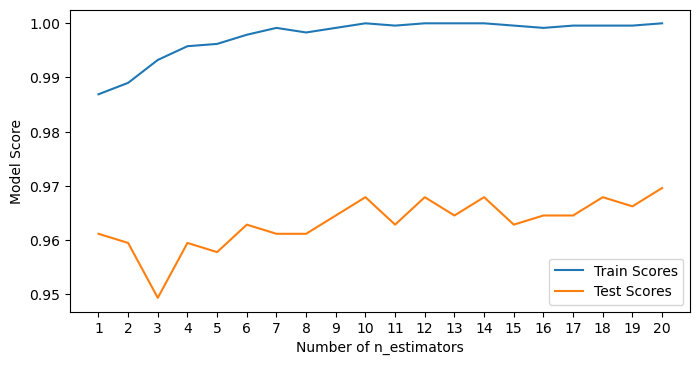

In [120]:
fig = plt.figure(figsize=(8,4), dpi=100)
plt.plot(k_estimators, train_scores_random_forest, label="Train Scores")
plt.plot(k_estimators, test_scores_random_forest, label="Test Scores")
plt.xticks(np.arange(1, 21))
plt.xlabel("Number of n_estimators")
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum model score on the training data : {max(train_scores_random_forest)*100:.2f}%")
print(f"Maximum model score on the test data : {max(test_scores_random_forest)*100:.2f}%")

Tuning K-Nearest Neighbor Classifier

In [121]:
train_scores_knn = []
test_scores_knn = []
# Setting up n_neighbors testing parameter in the range(1,21)
k_neighbors = range(1, 21)

# Initializing the K-Nearest Neighbor Classifier()
knn = KNeighborsClassifier()

# Looping through different n_estimators to find out best accuracy
for i in k_neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores_knn.append(knn.score(X_train, y_train))
    test_scores_knn.append(knn.score(X_test, y_test))

Maximum model score on the training data : 100.00%
Maximum model score on the test data : 92.57%


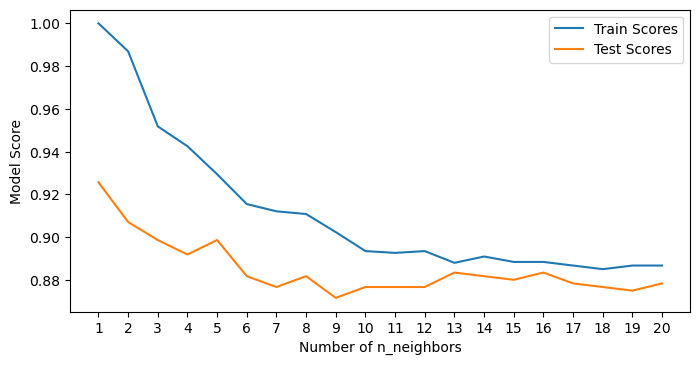

In [122]:
fig = plt.figure(figsize=(8,4), dpi=100)
plt.plot(k_neighbors, train_scores_knn, label="Train Scores")
plt.plot(k_neighbors, test_scores_knn, label="Test Scores")
plt.xticks(np.arange(1, 21))
plt.xlabel("Number of n_neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum model score on the training data : {max(train_scores_knn)*100:.2f}%")
print(f"Maximum model score on the test data : {max(test_scores_knn)*100:.2f}%")

### 7.3 Hyperparameter tuning using GridSearchCV

Tuning Random Forest Classifier

In [123]:
random_forest_grid_gs = {"n_estimators": range(10, 101)}
random_forest_gs = GridSearchCV(RandomForestClassifier(),
                           param_grid=random_forest_grid_gs,
                           cv=10,
                           verbose=True,
                           n_jobs=-1,
                           refit=True)
random_forest_gs.fit(X_train, y_train)
print("Model Score : ", random_forest_gs.score(X_test, y_test))
print("10-Fold Cross Validated Score : ", np.mean(cross_val_score(random_forest_gs, X_test, y_test, cv=10, n_jobs=-1)))

Fitting 10 folds for each of 91 candidates, totalling 910 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 910 out of 910 | elapsed:   54.0s finished


Model Score :  0.9577702702702703
10-Fold Cross Validated Score :  [0.9        0.98333333 0.91525424 0.86440678 0.96610169 0.98305085
 0.94915254 0.91525424 0.89830508 0.98305085]


In [124]:
random_forest_gs.best_params_

{'n_estimators': 85}

Tuning the Support Vector Machine

In [127]:
svc_grid_gs = {"C": np.arange(2, 10, 2),
               "gamma": np.arange(0.1, 1, 0.2)}
svc_gs = GridSearchCV(SVC(),
                      param_grid=svc_grid_gs,
                      cv=10,
                      verbose=True,
                      n_jobs=-1,
                      refit=True)
svc_gs.fit(X_train, y_train)
print("Model Score : ", svc_gs.score(X_test, y_test))
print("10-Fold Cross Validated Score : ", np.mean(cross_val_score(svc_gs, X_test, y_test, cv=10, n_jobs=-1)))

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.4min finished


Model Score :  0.9510135135135135
10-Fold Cross Validated Score :  0.7043785310734463


In [128]:
svc_gs.best_params_

{'C': 2, 'gamma': 0.1}

Tuning K-Nearest Neighbor

In [129]:
knn_grid_gs = {"n_neighbors" : np.arange(1,50)}
knn_rs = GridSearchCV(KNeighborsClassifier(),
                            param_grid=knn_grid_gs,
                            cv=10,
                            verbose=True,
                            n_jobs=-1)
knn_rs.fit(X_train, y_train)
print("Model Score : ", knn_rs.score(X_test, y_test))
print("10-Fold Cross Validated Score : ", np.mean(cross_val_score(knn_rs, X_test, y_test, cv=10, n_jobs=-1)))

Fitting 10 folds for each of 49 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed:   28.8s finished


Model Score :  0.9256756756756757
10-Fold Cross Validated Score :  0.861497175141243


In [130]:
knn_rs.best_params_

{'n_neighbors': 1}

## 8. Evaluating the machine learning models

### 8.1 Classification report

In [ ]:
random_forest_gs_ypred = random_forest_gs.predict(X_test)
svc_gs_ypred = svc_gs.predict(X_test)

In [ ]:
print(classification_report(y_test, random_forest_gs_ypred))

In [ ]:
print(classification_report(y_test, svc_gs_ypred))

### 8.2 Confusion matrix

Confusion matrix of Random Forest Classifier

In [ ]:
sns.heatmap(confusion_matrix(y_test, random_forest_gs_ypred), cmap= "Blues", annot=True, fmt='')

Confusion matrix of Support Vector Machine (SVM)

In [ ]:
sns.heatmap(confusion_matrix(y_test, svc_gs_ypred), cmap= "Blues", annot=True, fmt='')

### 8.3 ROC curve

ROC curve of Random Forest Classifier

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(random_forest_gs, X_test, y_test)

ROC curve of Support Vector Machine (SVM)

In [ ]:
plot_roc_curve(svc_gs, X_test, y_test)

### 8.4 Cross-validated metrics

Random Forest Cross-validated Metrics

In [ ]:
random_forest_gs_cv = RandomForestClassifier(n_estimators=random_forest_gs.best_params_["n_estimators"], random_state=42)
random_forest_gs_cv.fit(X_train, y_train)
random_forest_gs_cv_acc = cross_val_score(random_forest_gs_cv, X, y, cv=10, scoring="accuracy")
random_forest_gs_cv_pre = cross_val_score(random_forest_gs_cv, X, y, cv=10, scoring="precision")
random_forest_gs_cv_recall = cross_val_score(random_forest_gs_cv, X, y, cv=10, scoring="recall")
random_forest_gs_cv_f1 = cross_val_score(random_forest_gs_cv, X, y, cv=10, scoring="f1")

In [ ]:
random_forest_gs_cv_metrics = pd.DataFrame({"Accuracy": np.mean(random_forest_gs_cv_acc),
                                                     "Precision": np.mean(random_forest_gs_cv_pre),
                                                     "Recall": np.mean(random_forest_gs_cv_recall),
                                                     "F1 Score": np.mean(random_forest_gs_cv_f1)},
                                                      index=["Result"]).T
random_forest_gs_cv_metrics
random_forest_gs_cv_metrics_fig = px.bar(random_forest_gs_cv_metrics, y=random_forest_gs_cv_metrics["Result"] * 100)
random_forest_gs_cv_metrics_fig.update_layout(title_text='Random Forest Cross-validated Metrics',
                                              xaxis_title="Performance Metrics",
                                              yaxis_title="Score")
random_forest_gs_cv_metrics_fig.update_layout(font_family="Courier New",
                                              font_color="blue",
                                              title_font_family="Courier New",
                                              title_font_color="orange")
random_forest_gs_cv_metrics_fig.show()

SVM Cross-validated Metrics

In [ ]:
svc_gs_cv = SVC(gamma=svc_gs.best_params_["gamma"], C=svc_gs.best_params_["C"])
svc_gs_cv.fit(X_train, y_train)
svc_gs_cv_acc = cross_val_score(svc_gs_cv, X, y, cv=10, scoring="accuracy")
svc_gs_cv_pre = cross_val_score(svc_gs_cv, X, y, cv=10, scoring="precision")
svc_gs_cv_recall = cross_val_score(svc_gs_cv, X, y, cv=10, scoring="recall")
svc_gs_cv_f1 = cross_val_score(svc_gs_cv, X, y, cv=10, scoring="f1")

In [ ]:
svc_gs_cv_metrics = pd.DataFrame({"Accuracy": np.mean(svc_gs_cv_acc),
                                                     "Precision": np.mean(svc_gs_cv_pre),
                                                     "Recall": np.mean(svc_gs_cv_recall),
                                                     "F1": np.mean(svc_gs_cv_f1)},
                                                      index=["Result"]).T
svc_gs_cv_metrics
svc_gs_cv_metrics_fig = px.bar(svc_gs_cv_metrics, y=svc_gs_cv_metrics["Result"] * 100)
svc_gs_cv_metrics_fig.update_layout(title_text='Cross-validated Support Vector Machine Metrics',
                                    xaxis_title="Performance Metrics",
                                    yaxis_title="Score")
svc_gs_cv_metrics_fig.update_layout(
                                    font_family="Courier New",
                                    font_color="blue",
                                    title_font_family="Courier New",
                                    title_font_color="orange"
)
svc_gs_cv_metrics_fig.show()

## 9. Conclusion

<p> Random Forest Classifier and K-Nearest Neighbor algorithm performed excellently out of the box at 97% and 92.6% accuracy, respectively, while Support Vector Machine (SVM) Classifier only got an Accuracy score of 85.47%. However, these scores are calculated without cross-validating the results. While tuning hyperparameters using GridSearchCV, Support Vector Machine (SVM) Classifier outperformed K-Nearest Neighbor by performing at 95.1%. The performance scores were similar for both Random Forest Classifier and K-Nearest Neighbor at 97.39% and 92.6%, respectively. At this point, I eliminated the K-Nearest Neighbor since there was not much room for tuning the hyperparameters. <p>
<p>In conclusion, Random Forest Classifier outperformed Support Vector Machine (SVM) Classifier by 2.20% in Accuracy on the given dataset. </p>